# Working with Reddit cats subreddit data

## Retrieving the names of the data files that are available

When writing code I'm very lazy so I'm not going to define the filenames of the data available but let the script just retrieve it from the data folder

In [1]:
import glob

# get all json filenames in data folder
data_files = glob.glob("data/cats_*.json")
print (data_files)

['data/cats_2015.json', 'data/cats_2016.json', 'data/cats_2017.json', 'data/cats_2018.json', 'data/cats_2019.json']


## Example of retrieving a post from our reddit data 

In this example we will retrieve the first post from the data file cats_2015.json which contains all cats related discussions and advice (tagged as such) from the **cats subreddit** from **2015**


In [2]:
import json
from pprint import pprint

# open first dat files (index 0) in this case 'data/cats_2015.json'
with open(data_files[0]) as json_file:
    # load data as a json object
    data = json.load(json_file)
    
    # get first post (index 0)
    # and output title and description
    first_post = data[0]
    pprint(first_post['title'])
    pprint(first_post['description'])
    

'How much does your cat cost you?'
('The last time I owned cats was when I was 14. We had them from before I was '
 "born until we put one down at 9 and the other at 14; I'm now 22 and moving "
 'out on my own soonish (within the next year or so hopefully) for school. I '
 'really, really want a cat to help keep me sane during school and because '
 'cat.\n'
 '\n'
 'However, since the last time I had one was when I was a kid, I have no real '
 'context for how expensive cats are outside of cans of food. Everything '
 'online is from several years ago and I know prices have changed since then.\n'
 '\n'
 'How much does your cat run you on an average year? Or cats if you have more '
 'than one? What about on a particularly bad year where they ate a bra strap '
 'or something (like Boris the Cosmonaut Kitten from Facebook did last year)? '
 'Would it be financially reasonable to adopt a cat on a student budget? '
 'Help!\n'
 '\n'
 "EDIT: i'll be going to graduate school, not college. It's a

 ## Storing multiple descriptions
 
Generating data based on a single post is nice but it's interesting when we can analyze al the descriptions. For this we first need to combine and store all the descriptions (for now only for the year 2015)

In [3]:
# in this variable we will store all descriptions
all_descriptions = ""

# get all json files in data
with open(data_files[0]) as json_file:
    # load data as a json object
    data = json.load(json_file)
    for item in data:
        # get post description
        description = item['description']

        # store (append because we don't want to overwrite) the current description
        # with the other descriptions
        all_descriptions = '\n'.join([all_descriptions, description])


# print first 2500 characters        
pprint(all_descriptions[:2500])
        

('\n'
 'The last time I owned cats was when I was 14. We had them from before I was '
 "born until we put one down at 9 and the other at 14; I'm now 22 and moving "
 'out on my own soonish (within the next year or so hopefully) for school. I '
 'really, really want a cat to help keep me sane during school and because '
 'cat.\n'
 '\n'
 'However, since the last time I had one was when I was a kid, I have no real '
 'context for how expensive cats are outside of cans of food. Everything '
 'online is from several years ago and I know prices have changed since then.\n'
 '\n'
 'How much does your cat run you on an average year? Or cats if you have more '
 'than one? What about on a particularly bad year where they ate a bra strap '
 'or something (like Boris the Cosmonaut Kitten from Facebook did last year)? '
 'Would it be financially reasonable to adopt a cat on a student budget? '
 'Help!\n'
 '\n'
 "EDIT: i'll be going to graduate school, not college. It's a 2 year academic "
 'program 

## Generating a simple wordcloud from cats subreddit posted in 2015

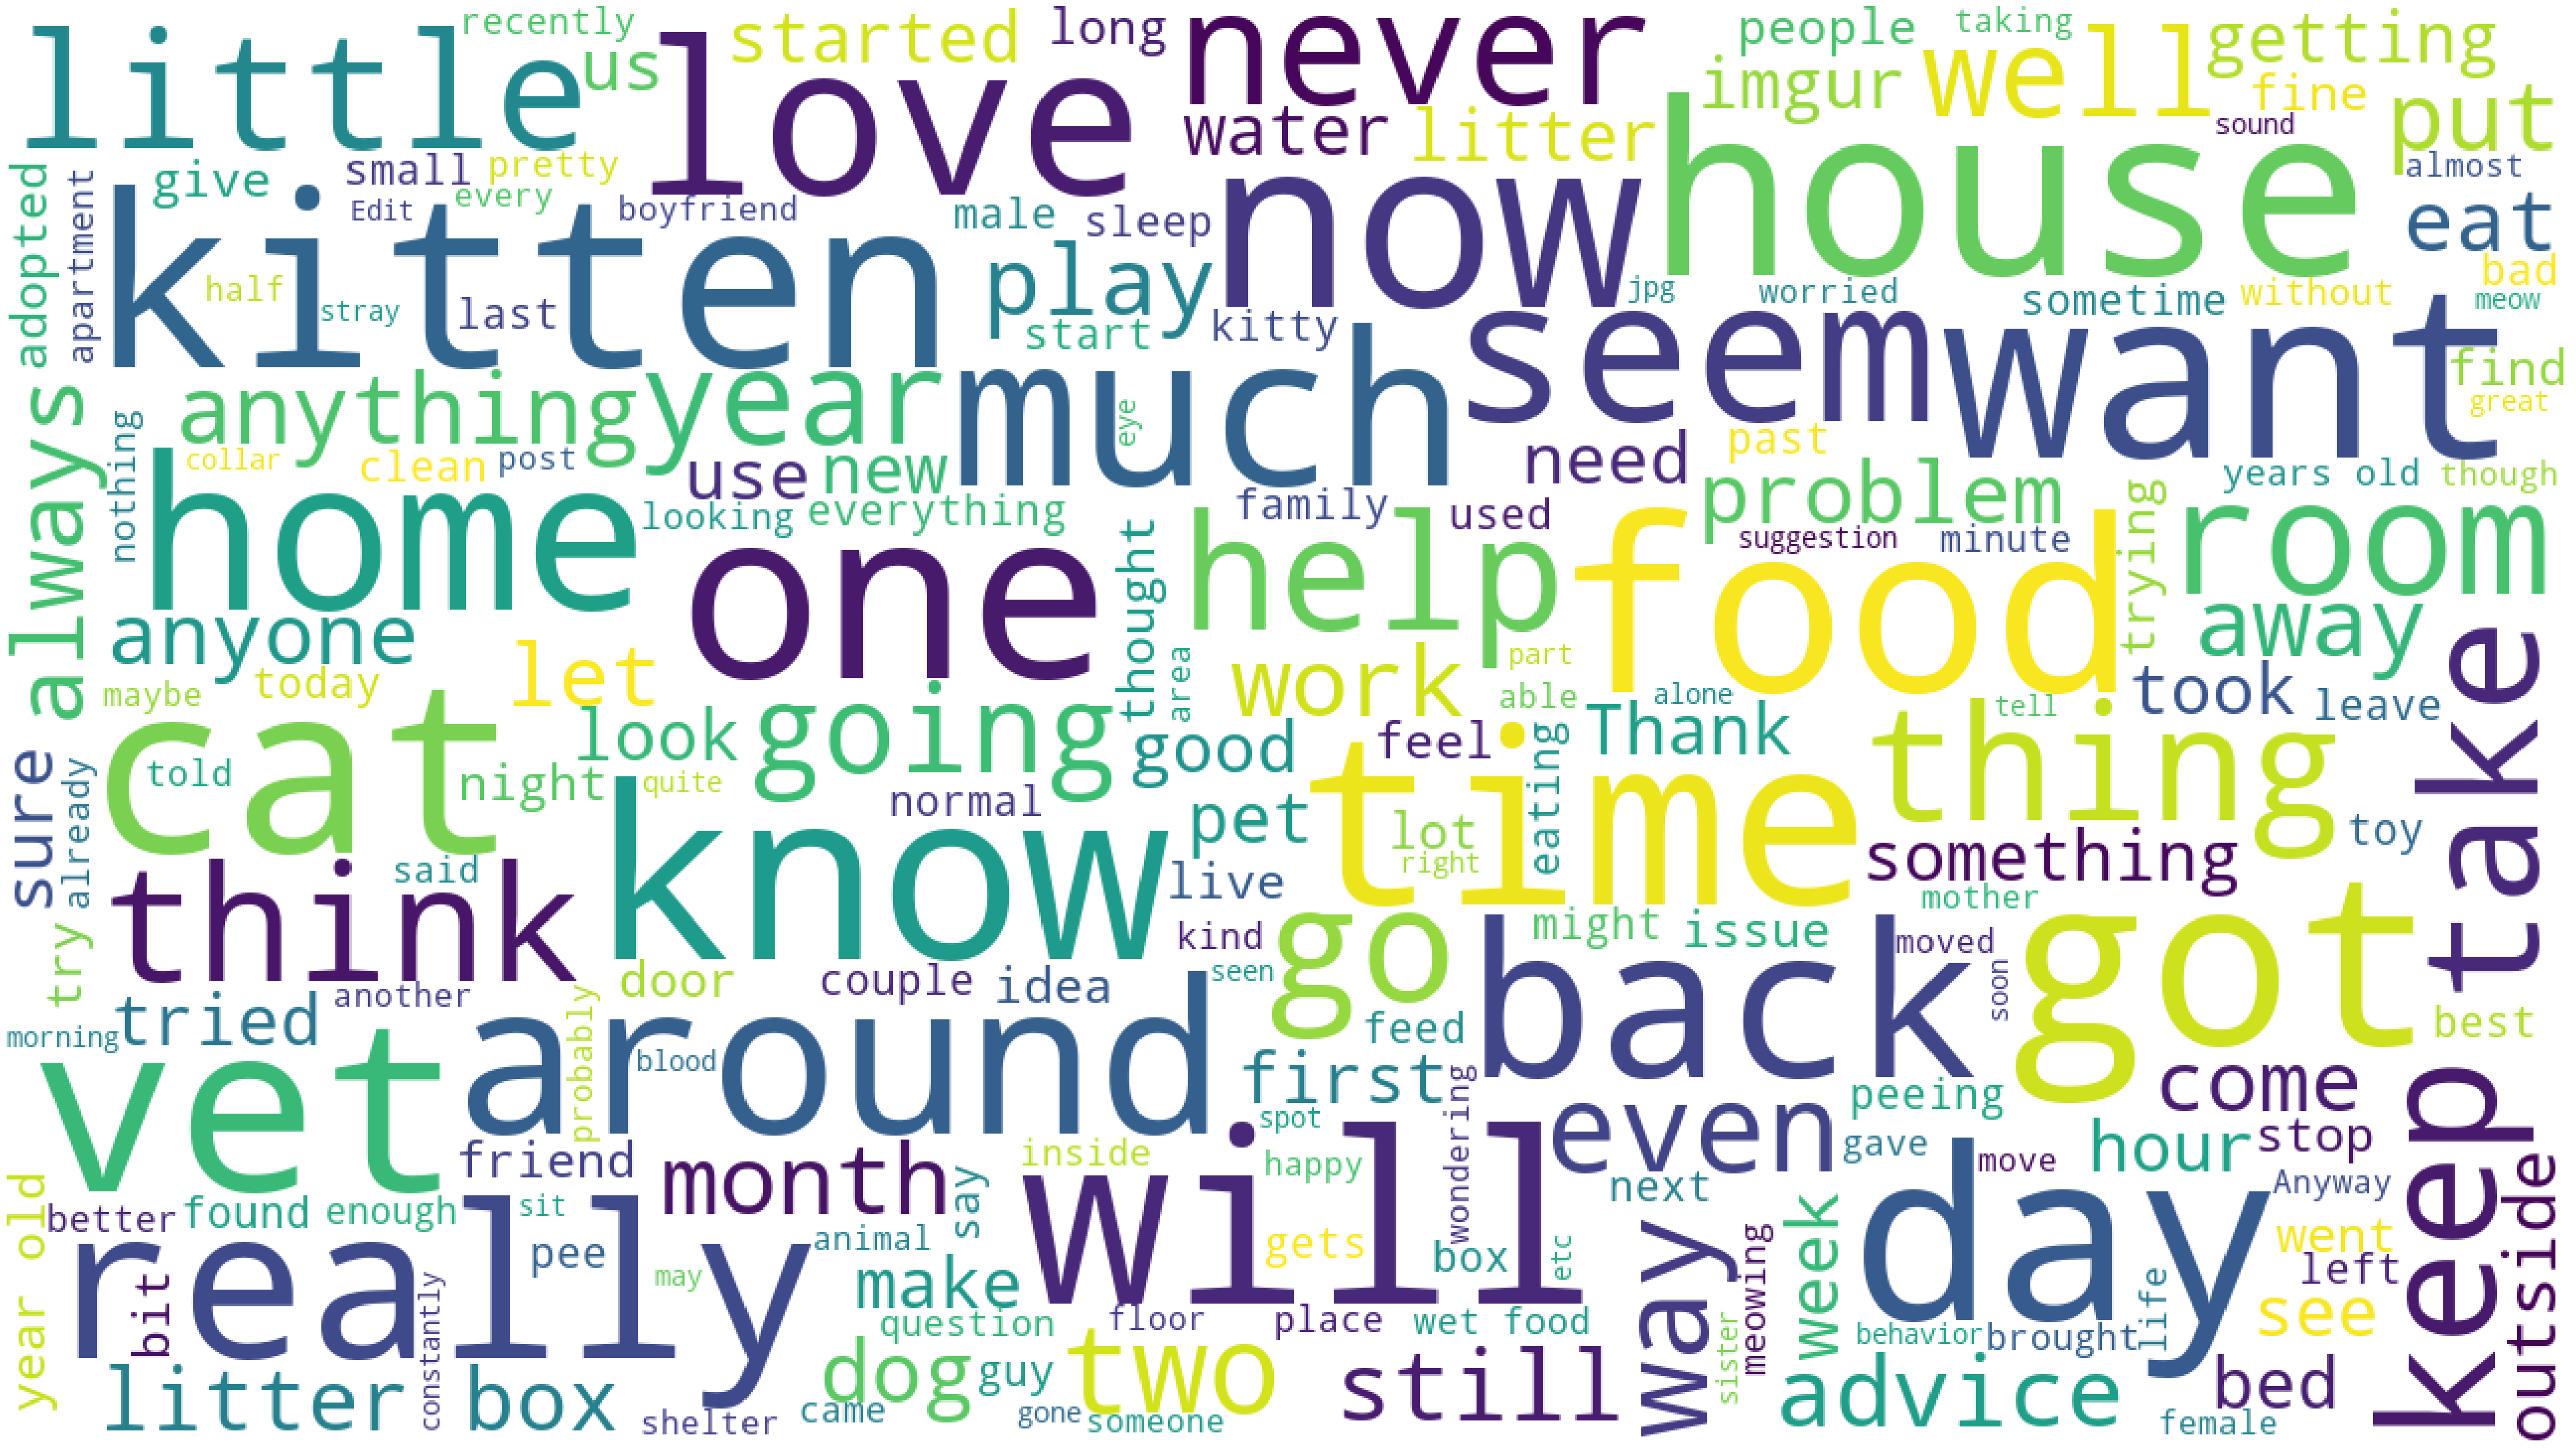

In [4]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# generate wordcloud
wordcloud  = WordCloud(max_font_size=120,background_color="white", repeat=True, width = 1280, height = 720)
wordcloud .generate(all_descriptions)

# Set figure size
plt.figure(figsize=(80, 40))

# Display image
plt.imshow(wordcloud) 

# No axis details
plt.axis("off");


## Cleaning up

So we have our wordcloud but as you can see there is a lot of noise (or words in this case) that does not have a lot of meaning.

In [10]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

# init spacy
activated = spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")  

# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)